# Module 5: Capstone Project

## Final Project Submission

Please fill out:
* Student name:  jenyl murdock
* Student pace: self paced / part time / full time:  part time
* Scheduled project review date/time: 
* Instructor name:  Jacob Eli Thomas
* Blog post URL: 

# The Dataset:   Brazilian Aeronautics Accidents

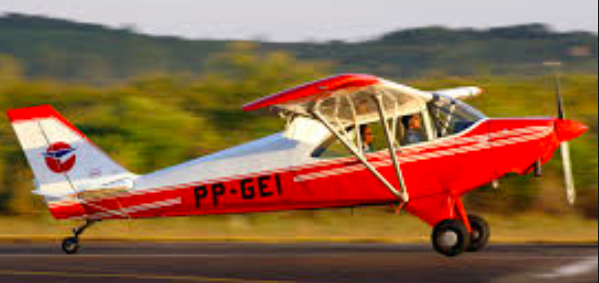

### The data for this project is from kaggle:
https://www.kaggle.com/paulovasconcellos/aeronautics-accidents-in-brazil#aircrafts.csv

### The following information is taken from the kaggle data site:

### Context
For many years airplanes have been considered the second safest transport mean in the world - losing just to elevators. Traveling great distances in short time, those aircrafts have brought several advantaged for the world, both in commercial and regular application. Unfortunately, as any transport mean, aircrafts have their own count of tragedies. The last event envolving airplanes - to the publication date - was the accident envolving the brazilian soccer team Chapecoense and a LAMIA's aircraft, which was transporting them to Colombia for a Championship. This tragedy brought back discussions and controversies about aircraft's security and human capacity during aeronautics occurrences.

### Content
This dataset was available by CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos - or Aeronautical Accidents Investigation and Prevention Center. Such files contains informations about occurrences which envolved aircrafts in the last 10 years. You may access more updated data by visiting Brazilian Open Data's official website, or clicking in the download links below.

### Acknowledgements
This dataset is available for studies and analysis thanks to CENIPA.



## Importing Libraries

In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import datetime

import warnings
warnings.filterwarnings(action='ignore')

# Part I:  Features Engineering

## Obtain and Scrub the Data 

In [2]:
# import the first file

from subprocess import check_output
print(check_output(['ls', 'aircrafts.csv']).decode('utf8'))

aircrafts.csv



In [3]:
# assign the data to a file called 'data'
# print out the shape (#rows, #columns), and the first 5 rows of the data

data = pd.read_csv('aircrafts.csv', na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1')
print ('shape of the data -', data.shape)

data.head()

shape of the data - (2043, 23)


,Unnamed: 0,aircraft_id,occurrence_id,registration,operator_id,equipment,manufacturer,model,engine_type,engines_amount,...,registration_country,registration_category,registration_aviation,origin_flight,destination_flight,operation_phase,type_operation,damage_level,fatalities_amount,extraction_day
0,0,4,45602,PPGXE,241,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SDPW,SDPW,UNKNOWN,INSTRUCTION,SUBSTANTIAL,NaN,2016-07-30
1,1,40,53551,PPGSZ,160,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,...,BRAZIL,PRI,INSTRUCTION,SBBP,SBBP,TAKEOFF,INSTRUCTION,LIGHT,NaN,2016-07-30
2,2,118,43721,PTCMT,1232,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,...,BRAZIL,TPX,AEROTAXI,NaN,NaN,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,NaN,2016-07-30
3,3,130,35556,PTEQI,3992,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,...,BRAZIL,TPP,PRIVATE,SNDU,SBSL,RUN AFTER LANDING,PRIVATE,LIGHT,NaN,2016-07-30
4,4,191,32579,PPVMM,4365,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,...,BRAZIL,TPR,REGULAR,NaN,NaN,ASCENSION,REGULAR,NONE,NaN,2016-07-30


In [4]:
# import the second file

data2 = pd.read_csv('occurrences.csv',
                        na_values=['****', '***',''],
                        header=0,
                        encoding='latin-1'
                       )
print ('shape of the data -', data2.shape)

data2.head()

shape of the data - (2027, 20)


,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,NaN,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,NaN,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,NaN,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30


In [5]:
print ('aircrafts columns:', list(data.columns))

aircrafts columns: ['Unnamed: 0', 'aircraft_id', 'occurrence_id', 'registration', 'operator_id', 'equipment', 'manufacturer', 'model', 'engine_type', 'engines_amount', 'takeoff_max_weight (Lbs)', 'seatings_amount', 'year_manufacture', 'registration_country', 'registration_category', 'registration_aviation', 'origin_flight', 'destination_flight', 'operation_phase', 'type_operation', 'damage_level', 'fatalities_amount', 'extraction_day']


In [6]:
print ('occurrences columns:', list(data2.columns))

occurrences columns: ['Unnamed: 0', 'occurrence_id', 'classification', 'type of occurrence', 'localization', 'fu', 'country', 'aerodrome', 'occurrence_day', 'time', 'under_investigation', 'investigating_command', 'investigation_status', 'report_number', 'published_report', 'publication_day', 'recommendation_amount', 'aircrafts_involved', 'takeoff', 'extraction_day']


### Drop columns that are not relevant to this project

In [7]:
data = data.drop(['Unnamed: 0','aircraft_id', 'registration'], axis=1)
data = data.drop(['operator_id','origin_flight', 'destination_flight', 'extraction_day'], axis=1)

In [8]:
data2 = data2.drop(['Unnamed: 0','localization','aerodrome', 'investigation_status', 'report_number'], axis=1)
data2 = data2.drop(['published_report','publication_day','under_investigation'], axis=1)
data2 = data2.drop(['investigating_command','recommendation_amount','extraction_day','takeoff'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 16 columns):
occurrence_id               2043 non-null int64
equipment                   2042 non-null object
manufacturer                1933 non-null object
model                       2028 non-null object
engine_type                 2043 non-null object
engines_amount              2034 non-null float64
takeoff_max_weight (Lbs)    2043 non-null int64
seatings_amount             2025 non-null float64
year_manufacture            2039 non-null float64
registration_country        2031 non-null object
registration_category       2034 non-null object
registration_aviation       2043 non-null object
operation_phase             2042 non-null object
type_operation              2043 non-null object
damage_level                2043 non-null object
fatalities_amount           355 non-null float64
dtypes: float64(4), int64(2), object(10)
memory usage: 255.5+ KB


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 8 columns):
occurrence_id         2027 non-null int64
classification        2027 non-null object
type of occurrence    2027 non-null object
fu                    2025 non-null object
country               2027 non-null object
occurrence_day        2027 non-null object
time                  2027 non-null object
aircrafts_involved    2027 non-null int64
dtypes: int64(2), object(6)
memory usage: 126.8+ KB


### Merge the two data sets based on the 'occurrence id' column
reference information: https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html

In [11]:
merged_data = pd.merge(left=data, right=data2, how='left', left_on='occurrence_id', right_on='occurrence_id')
merged_data.head()

,occurrence_id,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,registration_country,...,type_operation,damage_level,fatalities_amount,classification,type of occurrence,fu,country,occurrence_day,time,aircrafts_involved
0,45602,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1962.0,BRAZIL,...,INSTRUCTION,SUBSTANTIAL,NaN,ACCIDENT,UNKNOWN,SP,BRAZIL,2011-06-14,20:00:00,1
1,53551,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1960.0,BRAZIL,...,INSTRUCTION,LIGHT,NaN,SERIOUS INCIDENT,LOSS OF CONTROL ON THE GROUND,SP,BRAZIL,2015-11-05,19:15:00,1
2,43721,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,5092,6.0,1966.0,BRAZIL,...,AEROTAXI,SUBSTANTIAL,NaN,ACCIDENT,ABOUT LANDING GEAR,CE,BRAZIL,2010-12-15,09:00:00,1
3,35556,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,3600,6.0,1979.0,BRAZIL,...,PRIVATE,LIGHT,NaN,SERIOUS INCIDENT,ABOUT LANDING GEAR,MA,BRAZIL,2009-02-04,15:25:00,1
4,32579,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,115497,117.0,1975.0,BRAZIL,...,REGULAR,NONE,NaN,SERIOUS INCIDENT,ENGINE FAILURE DURING THE FLIGHT,AM,BRAZIL,2008-06-07,14:45:00,1


In [12]:
merged_data.shape

(2043, 23)

In [13]:
print ('merged data columns:', list(merged_data.columns))

merged data columns: ['occurrence_id', 'equipment', 'manufacturer', 'model', 'engine_type', 'engines_amount', 'takeoff_max_weight (Lbs)', 'seatings_amount', 'year_manufacture', 'registration_country', 'registration_category', 'registration_aviation', 'operation_phase', 'type_operation', 'damage_level', 'fatalities_amount', 'classification', 'type of occurrence', 'fu', 'country', 'occurrence_day', 'time', 'aircrafts_involved']


In [14]:
# drop the occurrence_id now that the data has been merged

merged_data = merged_data.drop(['occurrence_id'], axis=1)

In [15]:
#  look at some statistical information on the numerical features
# we can see the maximum and minimum values for some of the features and where the mean is

merged_data.describe()

,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,fatalities_amount,aircrafts_involved
count,2034.000000,2043.000000,2025.000000,2039.000000,355.000000,2043.000000
mean,1.244346,11750.045032,8.928889,1902.494850,3.208451,1.018600
std,0.483653,48511.565643,26.922299,402.024605,13.367108,0.173252
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1860.000000,2.000000,1975.000000,1.000000,1.000000
50%,1.000000,3600.000000,4.000000,1986.000000,2.000000,1.000000
75%,2.000000,4750.000000,6.000000,1999.000000,2.000000,1.000000
max,4.000000,630499.000000,301.000000,2015.000000,199.000000,4.000000


### Right away we can tell that our data primarily is dealing with smaller planes / air vehicles

## Check for missing data

In [16]:
merged_data.isnull().sum()

equipment                      1
manufacturer                 110
model                         15
engine_type                    0
engines_amount                 9
takeoff_max_weight (Lbs)       0
seatings_amount               18
year_manufacture               4
registration_country          12
registration_category          9
registration_aviation          0
operation_phase                1
type_operation                 0
damage_level                   0
fatalities_amount           1688
classification                 0
type of occurrence             0
fu                             2
country                        0
occurrence_day                 0
time                           0
aircrafts_involved             0
dtype: int64

## Inspect the data for each of the features and eliminate or replace any missing values 

In [17]:
# list the unique values of the equipment column and how many occurrances of each

print ('equipment:' , merged_data['equipment'].unique())
merged_data['equipment'].value_counts(dropna=False)

equipment: ['AIRPLANE' 'HELICOPTER' 'GLIDER' 'ULTRALIGHT' 'AMPHIBIOUS' 'UNKNOWN'
 'AIRSHIP' nan]


AIRPLANE      1603
HELICOPTER     264
ULTRALIGHT     151
GLIDER          11
AMPHIBIOUS       6
UNKNOWN          5
AIRSHIP          2
NaN              1
Name: equipment, dtype: int64

In [18]:
# replace the one nan value with 'unknown'
merged_data['equipment'] = merged_data['equipment'].fillna('UKNOWN')

#### Look at the rows with 'UNKNOWN' as the equipment type in order to determine if a type can be assigned based on other information for that occurrence

In [19]:
df1 = merged_data[merged_data['equipment'].str.contains("UNKNOWN")] 
print(df1) 

     equipment manufacturer         model engine_type  engines_amount  \
1931   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1944   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1954   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
1984   UNKNOWN          NaN           NaN     UNKNOWN             0.0   
2041   UNKNOWN   WZQ-OKECIE  PZL 106 KRUK     UNKNOWN             NaN   

      takeoff_max_weight (Lbs)  seatings_amount  year_manufacture  \
1931                         0              0.0               0.0   
1944                         0              0.0               0.0   
1954                         0              0.0               0.0   
1984                       458              0.0            2008.0   
2041                      6613              NaN               NaN   

     registration_country registration_category        ...          \
1931               BRAZIL                   PET        ...           
1944  

#### It doen't look like we have enough information to assign a specific value in these cases.

In [20]:
print ('manufacturer:' , merged_data['manufacturer'].unique())

merged_data['manufacturer'].value_counts(dropna=False)

manufacturer: ['NEIVA INDUSTRIA AERONAUTICA' 'BEECH AIRCRAFT' 'BOEING COMPANY'
 'CESSNA AIRCRAFT' 'PIPER AIRCRAFT' 'HELIBRAS' 'EMBRAER' 'XAVANTE'
 'AERO BOERO' 'INDÚSTRIA PARANAENSE DE ESTRUTURAS'
 'CIA AERONAUTICA PAULISTA' 'MAULE AIRCRAFT' 'BELL HELICOPTER' 'LEARJET'
 nan 'LAVIASA' 'NORTH AMERICAN' 'TWIN COMMANDER' 'ROBINSON HELICOPTER'
 'MITSUBISHI' 'AGUSTA' 'SIKORSKY AIRCRAFT' 'MOONEY AIRCRAFT'
 'AEROSPATIALE AND ALENIA' 'FABRICACAO PROPRIA' 'CHINCUL SACAIFI'
 'EUROCOPTER FRANCE' 'HUGHES HELICOPTER' 'AIRBUS INDUSTRIE'
 'EUROCOPTER DEUTSCHLAND' 'AIR TRACTOR' 'LET AIRCRAFT INDUSTRIES' 'FOKKER'
 'MCDONNELL DOUGLAS' 'AMERICAN CHAMPION' 'AEROMOT' 'RAYTHEON AIRCRAFT'
 'CIRRUS DESIGN' 'SCHWEIZER' 'CONSOLIDATED' 'HAWKER BEECHCRAFT' 'STEMME'
 'ANTONIO CESAR DA SILVA AMARAL' 'NILSON SULZBACH PERES' 'BRITTEN-NORMAN'
 'INPAER INDUSTRIA PAULISTA E AERONÁUTICA'
 'FLYER INDUSTRIA AERONAUTICA LTDA' 'TERRA AMBIENTAL E INCORPORADORA LTDA'
 'LAKE AIRCRAFT' 'AEROBRAVO LTDA' 'HENRIQUE HAMILTON CERQUEIR

NEIVA INDUSTRIA AERONAUTICA               388
CESSNA AIRCRAFT                           354
PIPER AIRCRAFT                            157
EMBRAER                                   155
AERO BOERO                                126
ROBINSON HELICOPTER                       117
BEECH AIRCRAFT                            117
NaN                                       110
BELL HELICOPTER                            40
HELIBRAS                                   39
BOEING COMPANY                             34
EUROCOPTER FRANCE                          33
AIR TRACTOR                                26
CIA AERONAUTICA PAULISTA                   24
CIRRUS DESIGN                              24
AIRBUS INDUSTRIE                           20
AEROSPATIALE AND ALENIA                    18
SIKORSKY AIRCRAFT                          13
AEROMOT                                    12
RAYTHEON AIRCRAFT                          12
AGUSTA                                     11
MAULE AIRCRAFT                    

In [21]:
# replace the nan values with 'Unknown'
merged_data['manufacturer'] = merged_data['manufacturer'].fillna('UKNOWN')

In [22]:
print ('model:' , merged_data['model'].unique())

merged_data['model'].value_counts(dropna=False)

model: ['56-C' '95-B55' 'EMB-721C' '737-241' '182P' 'EMB-711C' 'PA-28-140'
 'HB-350B' 'EMB-810C' 'A-122-B' 'PA-28R-200' 'AB-115' 'PA-30' '737-3K9'
 'EMB-820C NAVAJO' 'PA-18' '550' 'C90' 'KW1' '182M' 'AB-180' 'EMB-810D'
 'EMB-110P1' '56-C-1' 'EMB-820C CARAJA' '177B' 'CAP-4' '500' '172L' '402B'
 'PA-34-200' '56-B' '210K' '310Q' 'M-7-235' 'EMB-201' 'AS 350 BA' '210L'
 '206B' '182F' '412' 'AS 355 F2' 'EMB-711T' 'N35' '35' 'EMB-720D'
 'EMB-201A' '35A' 'EMB-202' 'EAGLE II' '208' 'EMB-721D' 'U206C' '650' '58'
 '150J' 'S550' '170A' 'EMB-200A' '182G' 'PA-25-235' 'A36' 'PA-31' 'A188B'
 'A-122-A' 'EMB-712' '400A' 'E55' '172D' '172A' 'AT-6D' '500-S' '200'
 'PA-39' '208B' 'EMB-110' 'U206E' 'EMB-710C' 'R22 BETA' 'F90' 'B90'
 'EMB-720C' '206L-3' 'R44' '310K' 'MU-2B-36A' 'PA-18-150' 'PA-25-260'
 'EMB-110P' 'T210N' 'NE-821' '95-C55' 'EMB-711ST' 'EMB-200' 'A109C'
 'S-76A' 'U206F' '25' 'M20M' '337A' 'ATR-42-300' 'V35B' 'P35' 'T210L'
 'V35' 'PA-32-300' 'PA-24-260' '180D' 'MU-2B-20' '170B' 'EMB-711B'
 'RAN

AB-115                           111
EMB-202                           78
EMB-201A                          72
EMB-810C                          61
EMB-810D                          38
R44                               35
58                                34
EMB-202A                          33
210L                              31
A188B                             30
152                               30
EMB-711C                          28
R22 BETA                          28
R44 II                            28
206B                              26
EMB-201                           25
EMB-720D                          25
CAP-4                             24
PA-25-235                         23
AS 350 B2                         23
R22                               22
PA-34-220T                        21
182P                              19
56-C                              18
EMB-712                           18
EMB-721C                          18
95-B55                            17
E

In [23]:
# replace the nan values with 'Unknown'
merged_data['model'] = merged_data['model'].fillna('UKNOWN')

In [24]:
merged_data['engine_type'] = merged_data['engine_type'].fillna('UKNOWN')
print ('engine_type:' , data['engine_type'].unique())

merged_data['engine_type'].value_counts()

engine_type: ['PISTON' 'JET' 'TURBOSHAFT' 'TURBOPROP' 'WITHOUT TRACTION' 'UNKNOWN']


PISTON              1601
TURBOSHAFT           148
TURBOPROP            139
JET                  117
UNKNOWN               28
WITHOUT TRACTION      10
Name: engine_type, dtype: int64

In [25]:
print ('engines_amount:' , merged_data['engines_amount'].unique())

data['engines_amount'].value_counts()

engines_amount: [ 1.  2.  0.  4.  3. nan]


1.0    1490
2.0     502
0.0      31
3.0       7
4.0       4
Name: engines_amount, dtype: int64

## *** still need to do: check row of nan to see if the value can be figured out

In [26]:
# replace the nan values with 1 for the engines amount

merged_data['engines_amount'] = merged_data['engines_amount'].fillna(1)


# convert engines_amount to data type string so the 'nan' data can be dropped
#data['engines_amount'] = data['engines_amount'].astype(str)

# select only the data for where the engines_amount is not a nan value
#data = data[data['engines_amount']!= 'nan'] 

In [27]:
print ('registration aviation:' , merged_data['registration_aviation'].unique())

merged_data['registration_aviation'].value_counts()

registration aviation: ['INSTRUCTION' 'AEROTAXI' 'PRIVATE' 'REGULAR' 'DIRECT ADMINISTRATION'
 'MULTIPLE' 'AGRICULTURAL' 'EXPERIMENTAL' 'SPECIALIZED'
 'INDIRECT ADMINISTRATION' 'NOT REGULAR' 'UNKNOWN' 'HISTORIC']


PRIVATE                    760
INSTRUCTION                370
AEROTAXI                   272
EXPERIMENTAL               202
AGRICULTURAL               196
REGULAR                     85
SPECIALIZED                 64
DIRECT ADMINISTRATION       45
UNKNOWN                     25
MULTIPLE                    11
INDIRECT ADMINISTRATION      7
NOT REGULAR                  5
HISTORIC                     1
Name: registration_aviation, dtype: int64

In [28]:
print ('seatings_amount:' , merged_data['seatings_amount'].unique())

merged_data['seatings_amount'].value_counts(dropna=False)

seatings_amount: [  2.   6. 117.   4.   7.   3. 142.  10.   1.  21.   5.  15.  20.  11.
   8.  19.  13.  17.   9.  14.  50.   0. 125. 154.  34.  49. 184. 179.
 157. 153. 115. 301. 183. 151. 148. 156. 185. 188.  32.  52. 107. 166.
 242.  27.  71.  73. 240. 173.  54. 197. 194. 152.  12. 193.  75.  16.
  nan]


 2.0      444
 6.0      382
 1.0      328
 4.0      320
 7.0      133
 0.0       83
 5.0       52
 3.0       48
 10.0      42
 8.0       37
 11.0      27
NaN        18
 14.0      14
 21.0      11
 107.0      9
 184.0      8
 50.0       7
 9.0        7
 156.0      7
 17.0       5
 73.0       5
 20.0       5
 125.0      4
 153.0      3
 154.0      3
 15.0       3
 54.0       3
 19.0       2
 52.0       2
 193.0      2
 71.0       2
 242.0      2
 32.0       1
 117.0      1
 185.0      1
 179.0      1
 301.0      1
 75.0       1
 194.0      1
 166.0      1
 115.0      1
 197.0      1
 142.0      1
 173.0      1
 188.0      1
 13.0       1
 183.0      1
 157.0      1
 16.0       1
 12.0       1
 152.0      1
 34.0       1
 49.0       1
 240.0      1
 148.0      1
 151.0      1
 27.0       1
Name: seatings_amount, dtype: int64

In [29]:
# convert seatings_amount to data type string so the 'nan' data can be dropped
merged_data['seatings_amount'] = merged_data['seatings_amount'].astype(str)

# select only the data for where the seatings_amount is not a nan value
merged_data = merged_data[merged_data['seatings_amount']!= 'nan'] 

In [30]:
print ('year_manufacture:' , merged_data['year_manufacture'].unique())

merged_data['year_manufacture'].value_counts(dropna=False)

year_manufacture: [1962. 1960. 1966. 1979. 1975. 1974. 1977. 1973. 1983. 1982. 1978. 1988.
 1990. 1976. 1951. 1981. 1980. 1989. 1969. 1986. 1970. 1947. 1972. 1971.
 1991. 1963. 1940. 1992. 1961.    0. 1993. 1994. 1987. 1968. 1950. 1964.
 1984. 1995. 1985. 1942. 1953. 2001. 1946. 1997. 1948. 1996. 1967. 1952.
 1956. 1945. 1965. 1999. 2004. 2000. 2005. 1998. 2003. 2006. 1958. 2002.
 2007. 1954. 1949. 2008. 2009. 2010. 1959. 1957. 1936. 2011. 1955. 2012.
 2013.   nan]


 0.0       84
 1980.0    82
 1976.0    81
 1992.0    80
 1974.0    69
 1973.0    65
 1977.0    63
 1993.0    61
 1979.0    61
 1981.0    60
 2007.0    57
 1990.0    53
 2008.0    50
 2010.0    45
 1978.0    44
 1998.0    42
 1991.0    42
 2012.0    41
 2006.0    41
 1975.0    39
 1997.0    38
 2011.0    37
 1982.0    37
 2009.0    37
 2005.0    36
 1988.0    35
 2001.0    34
 2004.0    34
 1995.0    31
 1972.0    29
           ..
 1968.0    16
 1984.0    16
 2013.0    14
 1961.0    13
 1946.0    12
 1966.0    12
 1996.0    11
 1963.0    11
 1960.0    11
 1947.0     9
 1965.0     7
 1948.0     6
 1964.0     5
 1950.0     5
 1967.0     5
 1951.0     5
 1958.0     3
 1954.0     3
 1949.0     3
 1953.0     3
 1956.0     2
 1957.0     2
 1940.0     2
 1959.0     1
 1955.0     1
 1945.0     1
NaN         1
 1936.0     1
 1952.0     1
 1942.0     1
Name: year_manufacture, Length: 74, dtype: int64

In [31]:
# convert year_manufacture to data type string so the 'nan' data can be dropped
merged_data['year_manufacture'] = merged_data['year_manufacture'].astype(str)

# select only the data for where the engines_amount is not a nan value
merged_data = merged_data[merged_data['year_manufacture']!= 'nan'] 

In [32]:
print ('registration_country:' , merged_data['registration_country'].unique())

merged_data['registration_country'].value_counts(dropna=False)

registration_country: ['BRAZIL' 'USA' 'UNKNOWN' nan 'FRENCH' 'SPAIN' 'SOUTH AFRICA' 'URUGUAY'
 'RUSSIA' 'POLAND' 'GERMAN']


BRAZIL          1987
USA               20
NaN                9
RUSSIA             1
FRENCH             1
UNKNOWN            1
SPAIN              1
SOUTH AFRICA       1
POLAND             1
URUGUAY            1
GERMAN             1
Name: registration_country, dtype: int64

In [33]:
merged_data['registration_country'] = merged_data['registration_country'].fillna('UKNOWN')

In [34]:
print ('registration_category:' , merged_data['registration_category'].unique())

merged_data['registration_category'].value_counts(dropna=False)

registration_category: ['PRI' 'TPX' 'TPP' 'TPR' 'ADE' 'M14' 'ADD' 'SAE-AG' 'PET' 'SAE' 'PIN'
 'SAE-AL' 'SAE-AP' 'ADF' 'AIF' 'S00' 'TPN' 'AID' 'PEX' nan 'PUH' 'D07'
 'M24' 'EXT']


TPP       752
PRI       358
TPX       272
SAE-AG    195
PET       187
TPR        85
SAE        57
ADE        38
EXT        13
PIN        11
PEX         9
NaN         9
AIF         6
TPN         5
ADF         5
S00         5
M14         4
SAE-AP      4
SAE-AL      3
ADD         2
PUH         1
M24         1
D07         1
AID         1
Name: registration_category, dtype: int64

### I couldn't find any relevant information on the meaning of these categories so I am dropping the column for now

In [35]:
merged_data = merged_data.drop(['registration_category'], axis=1)

In [36]:
print ('operation_phase:' , merged_data['operation_phase'].unique())

merged_data['operation_phase'].value_counts(dropna=False)

operation_phase: ['UNKNOWN' 'TAKEOFF' 'RUN AFTER LANDING' 'ASCENSION' 'MANEUVER' 'HOVERING'
 'FINAL APPROXIMATION' 'RUSH ON THE GROUND' 'LANDING' 'DESCEND' 'CRUISE'
 'TRAFFIC CIRCUIT' 'TAXI' 'RUSH IN THE AIR' 'SPECIALIZED' 'ANOTHER PHASE'
 'LOW ALTITUDE NAVIGATION' 'FINAL STRETCH' 'ENGINE START'
 'ENGINE OR ROTOR CHECKING' 'VERTICAL TAKEOFF' 'GROUND OPERATION'
 'PARKING' nan]


LANDING                     388
TAKEOFF                     348
CRUISE                      232
RUN AFTER LANDING           188
SPECIALIZED                 115
UNKNOWN                     103
ASCENSION                   100
MANEUVER                     98
FINAL APPROXIMATION          70
DESCEND                      67
ANOTHER PHASE                60
LOW ALTITUDE NAVIGATION      58
TRAFFIC CIRCUIT              53
TAXI                         40
RUSH ON THE GROUND           29
RUSH IN THE AIR              17
ENGINE START                 13
FINAL STRETCH                12
HOVERING                     10
PARKING                       9
GROUND OPERATION              6
VERTICAL TAKEOFF              4
ENGINE OR ROTOR CHECKING      3
NaN                           1
Name: operation_phase, dtype: int64

In [37]:
# replace the 1 nan value with 'Unknown'
merged_data['operation_phase'] = merged_data['operation_phase'].fillna('UNKNOWN')

In [38]:
print ('type operation:' , merged_data['type_operation'].unique())

merged_data['type_operation'].value_counts()

type operation: ['INSTRUCTION' 'AEROTAXI' 'PRIVATE' 'REGULAR' 'POLICIAL' 'AGRICULTURAL'
 'EXPERIMENTAL' 'SPECIALIZED' 'NOT REGULAR' 'UNKNOWN']


PRIVATE         760
INSTRUCTION     365
AEROTAXI        273
AGRICULTURAL    263
EXPERIMENTAL    153
REGULAR          91
SPECIALIZED      42
POLICIAL         37
UNKNOWN          26
NOT REGULAR      14
Name: type_operation, dtype: int64

In [39]:
print ('fatalitis:' , merged_data['fatalities_amount'].unique())

merged_data['fatalities_amount'].value_counts(dropna=False)

fatalitis: [ nan   2.   6.  10.  24.   3.   1.   4.   5.  19. 199.   7. 154.   8.
  14.  16.]


NaN       1679
 1.0       158
 2.0       101
 3.0        32
 4.0        23
 5.0        12
 6.0         6
 8.0         3
 7.0         3
 199.0       1
 154.0       1
 16.0        1
 14.0        1
 19.0        1
 24.0        1
 10.0        1
Name: fatalities_amount, dtype: int64

### There is a lot of missing values for the fatalities feature.  I will look at this feature for EDA but will essentially drop it for the rest of the project.

In [40]:
data_fatal = merged_data.copy()

# drop fatalities from the original data now that we have a copy
merged_data = merged_data.drop(['fatalities_amount'], axis=1)


# convert fatalities_amount to data type string so the 'nan' data can be dropped
data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(str)

# select only the data for where the seatings_amount is not a nan value
data_fatal = data_fatal[data_fatal['fatalities_amount'] != 'nan'] 

data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(float)
data_fatal['fatalities_amount'] = data_fatal['fatalities_amount'].astype(int)

In [41]:
data_fatal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 23 to 1992
Data columns (total 21 columns):
equipment                   345 non-null object
manufacturer                345 non-null object
model                       345 non-null object
engine_type                 345 non-null object
engines_amount              345 non-null float64
takeoff_max_weight (Lbs)    345 non-null int64
seatings_amount             345 non-null object
year_manufacture            345 non-null object
registration_country        345 non-null object
registration_aviation       345 non-null object
operation_phase             345 non-null object
type_operation              345 non-null object
damage_level                345 non-null object
fatalities_amount           345 non-null int64
classification              345 non-null object
type of occurrence          345 non-null object
fu                          345 non-null object
country                     345 non-null object
occurrence_day              34

In [42]:
print ('damage level:' , merged_data['damage_level'].unique())

merged_data['damage_level'].value_counts()

damage level: ['SUBSTANTIAL' 'LIGHT' 'NONE' 'UNKNOWN' 'DESTROYED']


SUBSTANTIAL    1184
DESTROYED       345
LIGHT           260
NONE            166
UNKNOWN          69
Name: damage_level, dtype: int64

In [43]:
print ('classification:' , merged_data['classification'].unique())

merged_data['classification'].value_counts()

classification: ['ACCIDENT' 'SERIOUS INCIDENT']


ACCIDENT            1468
SERIOUS INCIDENT     556
Name: classification, dtype: int64

### This column doesn't really give any pertinent information

In [45]:
merged_data = merged_data.drop(['classification'], axis=1)

In [46]:
print ('type of occurrence:' , merged_data['type of occurrence'].unique())

merged_data['type of occurrence'].value_counts()

type of occurrence: ['UNKNOWN' 'LOSS OF CONTROL ON THE GROUND' 'ABOUT LANDING GEAR'
 'ENGINE FAILURE DURING THE FLIGHT' 'SYSTEM / COMPONENT FAILURE'
 'ABOUT PASSENGERS/CREW DURING THE FLIGHT' 'LOSS OF CONTROL IN THE AIR'
 'LANDING ON UNPREDICTABLE PLACE' 'LANDING WITHOUT LANDING GEAR'
 'SLOW LANDING' 'FUEL STARVATION' 'AIR TRAFFIC'
 'COLLISION AGAINST OBSTACLE DURING THE FLIGHT' 'ANOTHER TYPES'
 'COMPONENT LOSS ON THE GROUND' 'LOSS OF COMPONENT DURING THE FLIGHT'
 'COLLISION AGAINST OBSTACLE ON THE GROUND' 'HARD LANDING'
 'ABOUT PROPELLER' 'LANDING BEFORE THE TRACK AREA'
 'METEOROLOGICAL PHENOMENOM ON THE GROUND'
 'METEOROLOGICAL PHENOMENOM IN THE AIR' 'TIRE BURST' 'FLIGHT COMMANDS'
 'TERRAIN COLLISION' 'ABOUT ROTOR' 'LEAVING THE TRACK'
 'AIRCRAFTS COLLISION ON THE GROUND' 'STRUCTURAL FAILURE'
 'ABOUT WINDOWS / DOORS / WINDSHIELD' 'FIRE ON THE GROUND'
 'LOW ALTITUDE MANEUVERS' 'FLUID LEAKS' 'LOAD LAUNCH'
 'AIRCRAFT HIT BY OBJECT' 'FIRE DURING THE FLIGHT'
 'EXPLOSIVE / NOT INTENTIONAL D

ENGINE FAILURE DURING THE FLIGHT                    374
LOSS OF CONTROL ON THE GROUND                       323
LOSS OF CONTROL IN THE AIR                          307
COLLISION AGAINST OBSTACLE DURING THE FLIGHT        139
ABOUT LANDING GEAR                                  130
ANOTHER TYPES                                        86
FUEL STARVATION                                      73
SYSTEM / COMPONENT FAILURE                           61
UNKNOWN                                              57
LANDING WITHOUT LANDING GEAR                         54
LANDING ON UNPREDICTABLE PLACE                       43
HARD LANDING                                         40
COLLISION AGAINST OBSTACLE ON THE GROUND             40
SLOW LANDING                                         30
LOSS OF COMPONENT DURING THE FLIGHT                  27
METEOROLOGICAL PHENOMENOM IN THE AIR                 27
TERRAIN COLLISION                                    21
LOW ALTITUDE MANEUVERS                          

In [47]:
print ('time:' , merged_data['time'].unique())

merged_data['time'].value_counts()

time: ['20:00:00' '19:15:00' '09:00:00' '15:25:00' '14:45:00' '14:00:00'
 '18:00:00' '14:50:00' '19:00:00' '15:30:00' '20:40:00' '10:40:00'
 '11:00:00' '20:10:00' '20:20:00' '01:54:00' '19:40:00' '16:30:00'
 '20:38:00' '14:49:00' '13:11:00' '20:30:00' '16:50:00' '23:50:00'
 '11:35:00' '18:58:00' '12:30:00' '17:30:00' '16:24:00' '19:08:00'
 '11:40:00' '19:39:00' '16:00:00' '09:55:00' '13:40:00' '18:30:00'
 '22:48:00' '11:25:00' '14:15:00' '14:40:00' '11:30:00' '18:15:00'
 '21:00:00' '13:00:00' '18:40:00' '11:15:00' '18:20:00' '12:20:00'
 '11:45:00' '15:36:00' '21:10:00' '14:20:00' '10:25:00' '16:40:00'
 '17:25:00' '13:39:00' '15:57:00' '18:45:00' '13:29:00' '18:25:00'
 '23:25:00' '20:25:00' '14:10:00' '17:35:00' '23:30:00' '03:15:00'
 '17:55:00' '18:35:00' '19:30:00' '16:33:00' '19:35:00' '09:43:00'
 '20:42:00' '13:50:00' '15:54:00' '13:47:00' '15:10:00' '14:05:00'
 '13:55:00' '21:05:00' '22:10:00' '12:40:00' '17:45:00' '19:25:00'
 '14:25:00' '22:50:00' '10:00:00' '10:30:00' '00:00:00' 

20:30:00    55
20:00:00    52
17:00:00    45
13:00:00    42
12:00:00    41
18:00:00    40
19:30:00    39
13:30:00    38
19:00:00    37
12:30:00    35
17:30:00    35
14:30:00    35
14:00:00    33
18:30:00    32
11:30:00    28
16:30:00    27
21:00:00    25
11:00:00    24
15:30:00    24
15:00:00    22
21:30:00    18
10:30:00    18
17:40:00    15
12:40:00    15
16:00:00    15
10:00:00    15
20:45:00    15
20:15:00    14
14:50:00    14
19:40:00    14
            ..
23:50:00     1
22:59:00     1
15:54:00     1
22:49:00     1
18:46:00     1
03:15:00     1
11:11:00     1
19:49:00     1
16:22:00     1
08:31:00     1
19:42:00     1
17:02:00     1
16:24:00     1
14:57:00     1
00:35:00     1
19:43:00     1
23:45:00     1
11:57:00     1
18:57:00     1
16:46:00     1
21:49:00     1
21:09:00     1
19:13:00     1
08:50:00     1
01:44:00     1
00:14:00     1
18:47:00     1
11:38:00     1
22:21:00     1
11:32:00     1
Name: time, Length: 436, dtype: int64

In [48]:
# pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
# efficient way to extract year from string format date

merged_data['year'] = pd.DatetimeIndex(merged_data['occurrence_day']).year
merged_data = merged_data.drop(['occurrence_day'], axis=1)
merged_data.head()


,equipment,manufacturer,model,engine_type,engines_amount,takeoff_max_weight (Lbs),seatings_amount,year_manufacture,registration_country,registration_aviation,operation_phase,type_operation,damage_level,type of occurrence,fu,country,time,aircrafts_involved,year
0,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1962.0,BRAZIL,INSTRUCTION,UNKNOWN,INSTRUCTION,SUBSTANTIAL,UNKNOWN,SP,BRAZIL,20:00:00,1,2011
1,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1.0,1455,2.0,1960.0,BRAZIL,INSTRUCTION,TAKEOFF,INSTRUCTION,LIGHT,LOSS OF CONTROL ON THE GROUND,SP,BRAZIL,19:15:00,1,2015
2,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2.0,5092,6.0,1966.0,BRAZIL,AEROTAXI,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,ABOUT LANDING GEAR,CE,BRAZIL,09:00:00,1,2010
3,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTON,1.0,3600,6.0,1979.0,BRAZIL,PRIVATE,RUN AFTER LANDING,PRIVATE,LIGHT,ABOUT LANDING GEAR,MA,BRAZIL,15:25:00,1,2009
4,AIRPLANE,BOEING COMPANY,737-241,JET,2.0,115497,117.0,1975.0,BRAZIL,REGULAR,ASCENSION,REGULAR,NONE,ENGINE FAILURE DURING THE FLIGHT,AM,BRAZIL,14:45:00,1,2008


In [51]:
print ('aircrafts involved' , merged_data['aircrafts_involved'].unique())

merged_data['aircrafts_involved'].value_counts()

aircrafts involved [1 2 4]


1    1995
2      26
4       3
Name: aircrafts_involved, dtype: int64

In [52]:
# check to verify there are no more null values
merged_data.isnull().sum()

equipment                   0
manufacturer                0
model                       0
engine_type                 0
engines_amount              0
takeoff_max_weight (Lbs)    0
seatings_amount             0
year_manufacture            0
registration_country        0
registration_aviation       0
operation_phase             0
type_operation              0
damage_level                0
type of occurrence          0
fu                          2
country                     0
time                        0
aircrafts_involved          0
year                        0
dtype: int64

#### Some of the features need to be converted to integer data type

In [53]:
# make the year manufacture an integer category
# convert other columns to appropriate data type category

merged_data['engines_amount'] = merged_data['engines_amount'].astype(float)
merged_data['engines_amount'] = merged_data['engines_amount'].astype(int)
merged_data['seatings_amount'] = merged_data['seatings_amount'].astype(float)
merged_data['seatings_amount'] = merged_data['seatings_amount'].astype(int)
merged_data['year_manufacture'] = merged_data['year_manufacture'].astype(float)
merged_data['year_manufacture'] = merged_data['year_manufacture'].astype(int)

In [54]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2042
Data columns (total 19 columns):
equipment                   2024 non-null object
manufacturer                2024 non-null object
model                       2024 non-null object
engine_type                 2024 non-null object
engines_amount              2024 non-null int64
takeoff_max_weight (Lbs)    2024 non-null int64
seatings_amount             2024 non-null int64
year_manufacture            2024 non-null int64
registration_country        2024 non-null object
registration_aviation       2024 non-null object
operation_phase             2024 non-null object
type_operation              2024 non-null object
damage_level                2024 non-null object
type of occurrence          2024 non-null object
fu                          2022 non-null object
country                     2024 non-null object
time                        2024 non-null object
aircrafts_involved          2024 non-null int64
year            

In [56]:
# for now I am going to drop these columns
merged_data = merged_data.drop(['fu','takeoff_max_weight (Lbs)' ], axis=1)

KeyError: "['fu' 'takeoff_max_weight (Lbs)'] not found in axis"

In [ ]:
###########   Example code  ####################################
# Get the count of the ID
#counts = axs['ID'].value_counts()

# Select the items where the ID count is less than 3 and remove them
#axs = axs[~axs['ID'].isin(counts[counts < 3].index)]

# Show info
#axs.info()
##################################################

# Part II: Exploratory Data Analysis

In [57]:
merged_data.head(3)

,equipment,manufacturer,model,engine_type,engines_amount,seatings_amount,year_manufacture,registration_country,registration_aviation,operation_phase,type_operation,damage_level,type of occurrence,country,time,aircrafts_involved,year
0,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1,2,1962,BRAZIL,INSTRUCTION,UNKNOWN,INSTRUCTION,SUBSTANTIAL,UNKNOWN,BRAZIL,20:00:00,1,2011
1,AIRPLANE,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTON,1,2,1960,BRAZIL,INSTRUCTION,TAKEOFF,INSTRUCTION,LIGHT,LOSS OF CONTROL ON THE GROUND,BRAZIL,19:15:00,1,2015
2,AIRPLANE,BEECH AIRCRAFT,95-B55,PISTON,2,6,1966,BRAZIL,AEROTAXI,RUN AFTER LANDING,AEROTAXI,SUBSTANTIAL,ABOUT LANDING GEAR,BRAZIL,09:00:00,1,2010


Text(0.5, 1.0, 'Number of Accidents per Year')

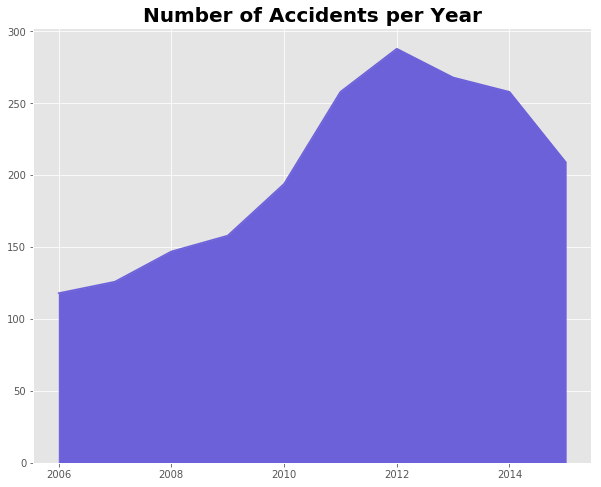

In [58]:
Year = merged_data['year'].value_counts().sort_index()
Year.plot.area(figsize=(10,8), color='#6d61da')
plt.title('Number of Accidents per Year', fontsize=20, fontweight='bold')

In [59]:
# graph of accidents by equipment type
equip = merged_data['equipment'].value_counts()
equip = equip.sort_values(ascending=False)
equip
# equip.plot.barh(color='#d9436a', figsize=(10,5))
# plt.title('Accidents by Aircraft Type', fontsize=20, fontweight='bold')

AIRPLANE      1591
HELICOPTER     264
ULTRALIGHT     146
GLIDER          11
AMPHIBIOUS       6
UNKNOWN          4
AIRSHIP          2
Name: equipment, dtype: int64

https://github.com/emilypfeifer/sitcoms/blob/master/2_sitcoms_EDA.ipynb
[10]

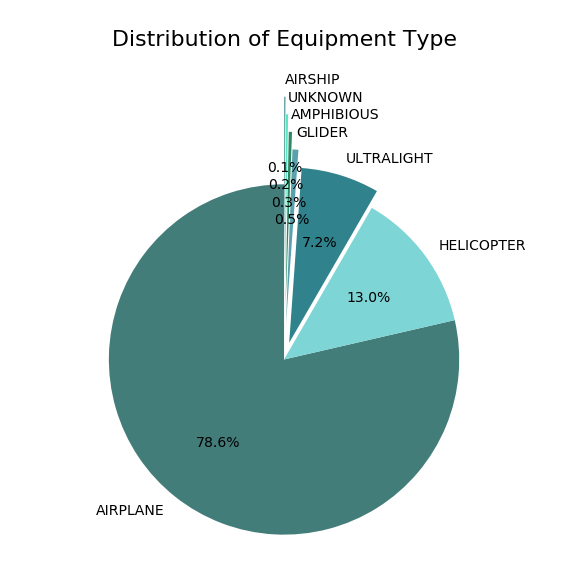

In [60]:
# Create a list of colors (from iWantHue)
colors = ["#437d79", "#7ed5d6", '#30838c','#5aa1ae', "#2a8a65", "#5de6bb",'#30838c' ]

# Create a pie chart
fig1, ax1 = plt.subplots(figsize = (8, 8)) #creating pie chart, setting size

patches, texts, autotext = ax1.pie(
    # using type of equipment
    equip.values,
    # with the labels being equipment names
    labels=equip.index,
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, .1, .2, .3, .4, .5),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    #fontsize
    textprops={'fontsize': 14}
    )

# View the plot drop above
ax1.axis('equal')
plt.title('\n Distribution of Equipment Type \n', fontsize = 22)
# View the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accidents by Engine Type')

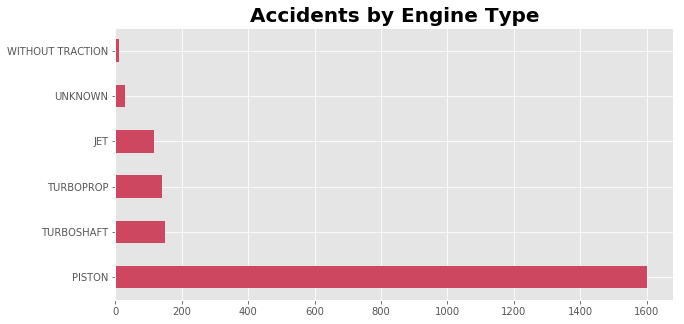

In [61]:
#engine type
engine = data['engine_type'].value_counts()
engine= engine.sort_values(ascending=False)

engine.plot.barh(color='#cd4761', figsize=(10,5))
plt.title('Accidents by Engine Type', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Operation Type')

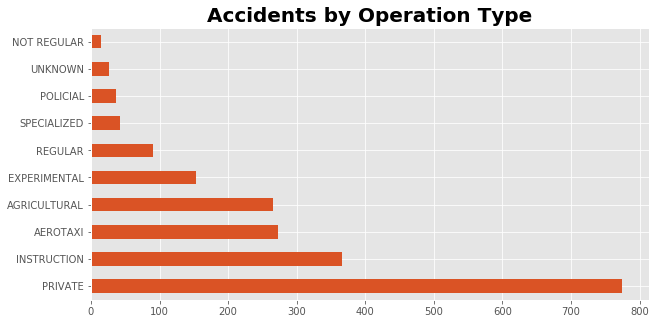

In [62]:
# type of operation

type_op = data['type_operation'].value_counts()
type_op = type_op.sort_values(ascending=False)

type_op.plot.barh(color='#da5325', figsize=(10,5))
plt.title('Accidents by Operation Type', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Accidents by Phase of Operation')

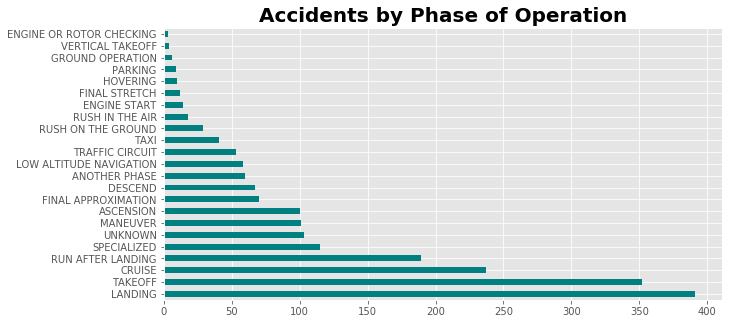

In [63]:
# operation phase

phase = data['operation_phase'].value_counts()
phase = phase.sort_values(ascending=False)

phase.plot.barh(color='teal', figsize=(10,5))
plt.title('Accidents by Phase of Operation', fontsize=20, fontweight='bold')

In [64]:
plane_data = merged_data[merged_data['equipment'] == 'AIRPLANE']
adamage = plane_data['damage_level'].value_counts()
adamage = adamage.sort_values(ascending=False)

heli_data = merged_data[merged_data['equipment'] == 'HELICOPTER']
hdamage = heli_data['damage_level'].value_counts()
hdamage = hdamage.sort_values(ascending=False)

Text(0.5, 0.98, 'Categorical Plotting')

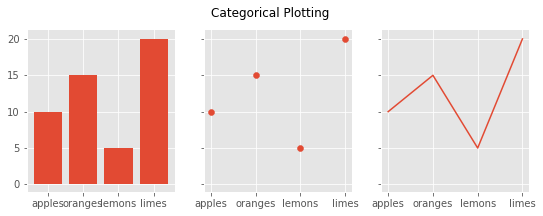

In [68]:
import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')


In [ ]:
f, axs = plt.subplots(1,2, figsize=(15,6), sharex=True)

adamage.plot(kind='bar', alpha=0.9, color='orange',ax=axs[0] )
hdamage.plot(kind='bar', alpha=0.9, color='orange',ax=axes[1] )

# Plot a simple distribution of the desired columns
#sns.distplot(df['col1'], color="b", ax=axes[0, 0])
#sns.distplot(df['col2'], color="m", ax=axes[0, 1])
#sns.distplot(df['col3'], color="r", ax=axes[1, 0])
#sns.distplot(df['col4'], color="g", ax=axes[1, 1])

#plt.setp(axs, yticks=[])
plt.tight_layout()

plt.xlabel('Damage Level')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.title('Airplane Damage Levels' , fontsize=12, fontweight='bold')
plt.grid(color='k', axis='y', alpha=0.4, lw=0.8)
plt.show()


In [69]:
data['Age'] = np.where(pd.to_numeric(data['Age'], 'coerce').notnull(), data['Age'], np.nan)
clean_age = data[['Age']].dropna()
clean_age = clean_age.astype(int)

sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'lightblue'}, font_scale=0.9)
damage.plot(kind='hist', figsize=(8,6), alpha=0.9, bins=25, color='orange')
plt.xlabel('Age in Years')
plt.ylabel('Number of Victims', fontsize=10)
plt.title('Victims Grouped by Age', fontsize=12, fontweight='bold')
plt.grid(color='k', axis='y', alpha=0.4, lw=0.8)
plt.show()


KeyError: 'Age'

In [ ]:
f, ax = plt.subplots(figsize = (10,5))

sns.barplot(merged_data['damage_level'], damage, ci = False, color = 'steelblue')

#sns.barplot(merged_data['damage_level'],merged_data['equipment'], ci = False, color = 'steelblue')

# draw line for average
#ax.axhline(y = equipment.mean(), color = 'yellow', lw = 3, linestyle = '--', label = 'average tempo')

# rotate x-ticks to make it easier to read
plt.xticks(rotation = 90)
plt.title('Damage by Equipment', fontsize = 15, fontweight = 'bold')
plt.xlabel('equipment', fontsize = 16)
plt.ylabel('damage', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

In [ ]:

# select the manufacturers that have 10 or more occurrances

manufacturers = data['manufacturer'].value_counts()
manuf_data = merged_data[merged_data['manufacturer'].isin(manufacturers.index[manufacturers >=10]).values]

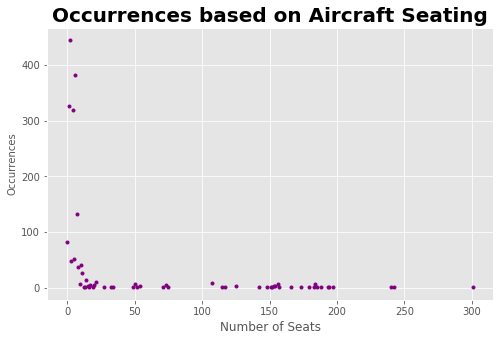

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#data['Ages'] = data['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
seats = merged_data['seatings_amount'].value_counts().sort_index()
plt.xlabel('Number of Seats')
plt.ylabel('Occurrences', fontsize=10)
plt.title('Occurrences based on Aircraft Seating', fontsize=20, fontweight='bold')
seats.plot(style=".", color='purple', figsize=(8,5))

# Part III:  Build Machine Learning Models

### Preprocess the data

In [ ]:
merged_data.shape

In [ ]:
data_by_damage = merged_data.groupby('damage_level')  # group data by damage level
levels = list(merged_data['damage_level'].unique())  # list of damage categories
print ('damage levels:',levels)

#### Replace the unknown values with the value of 'substantial' since statistically this is the most frequent value of damage (the mode)

In [ ]:
merged_data['damage_level'] = (merged_data['damage_level'].replace('UNKNOWN', 'SUBSTANTIAL')).astype('str')

Stackoverflow:
In most cases getting rid of infinite and null values solve this problem.

get rid of infinite values.

df.replace([np.inf, -np.inf], np.nan, inplace=True)
get rid of null values the way you like, specific value such as 999, mean, or create your own function to impute missing values

df.fillna(999, inplace=True)
or

df.fillna(df.mean(), inplace=True)

In [ ]:
data['damage_level'] = data['damage_level'].fillna('SUBSTANTIAL')

In [ ]:
# Encode the labels for damage level - use LabelEncoder for target variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['damage_level'] = pd.DataFrame(le.fit_transform(data['damage_level']))

print(data.head(3))

# for more information see documentation at: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [ ]:
np.isnan(data['damage_level']).sum()

In [ ]:
# to see where the nan values are
np.where(np.isnan(data['damage_level']))

In [ ]:
data.tail()

In [ ]:
data = data.iloc[0:-3, :]

In [ ]:
data.tail()

## I.  Logistic Regression Model
### Process:

* Normalization
* Define X and y
* Train-Test Split
* Fit a Model
* Predict
* Generate a Confusion Matrix
* Calculate Evaluation Metrics

### Step 1:  Define X and y

#### First we have to create dummy variables for the features we are using before using them to define X and y

In [ ]:
x_feats = ['equipment', 'engine_type', 'registration_aviation', 'operation_phase', 'type_operation']
X = pd.get_dummies(merged_data[x_feats])

y = merged_data['damage_level']

### Make sure all nan values are eliminated from the data

In [ ]:
np.isnan(X).sum()

In [ ]:
np.isnan(y).sum()

### Normalization is not needed for this dataset so we can proceed to the Train Test Split phase


### Step 2: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### Step 3:  Fit a Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12)
model_log = logreg.fit(X_train, y_train)
model_log

### Step 4: Predict

In [ ]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [ ]:
# residuals are the values between the actual y value and the predicted y value
# check the residuals for the train data

residuals = np.abs(y_train - y_hat_train)

print (pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

In [ ]:
# now check the residuals for the test data

residuals = np.abs(y_test - y_hat_test)

print (pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

### The classifier was 62.8% accurate with the training data and 63.2% with the test data

When the test data was categorized, 499 entries were correctly labeled. This represents about 63% of the test data.

With a confusion matrix, we can see which genres were more often correctly labeled, as well as those that were mislabeled the majority of the time.

### Step 6.  Generate a Confusion Matrix

"A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix."
geeksforgeeks.org/confusion-matrix-machine-learning/

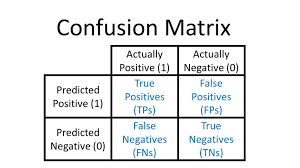

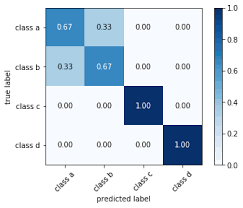

The results from the confusion matrix enable us to calculate different evaluation metrics for our classification problem. These metrics include precision, recall, accuracy, and the F-1 score.

For more of an explanation of a confusion matrix, visit:
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

See https://www.youtube.com/watch?v=8Oog7TXHvFY at 24:30 to learn about reading a confusion matrix for a multi-categorical classification model

In [ ]:
# generate a multi-categorical confusion matrix (code adapted from lab dsc-3-27-08)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat_test)
cm

# EDIT
The true labels run down the left side of the matrix, genres 0 thru 3
The predicted labels run across the top (or bottom) of the matrix.
The diagonal numbers of the matrix represents how many times the true value was predicted correctly.  As you can see, the model did only a fair job predicting the correct genre.  In the case of genre 3 (disco), it was classified 16 times as genre 7 (pop).  If we look at the reverse case, genre 7 was never classified as genre 3.  Let's take a look at this more visually.

In [ ]:
# visualize the confusion matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(15,10))  # added to change figure size
    plt.imshow(cf, cmap=plt.cm.OrRd)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(y_test, y_hat_test)

# EDIT
Ideally, the diagonal of this matrix would be shaded darker than the areas above or below it. This would mean that the true label was predicted correctly the majority of the time. Looking at the diagonal, we can see that ............. were correctly classified the most, whereas ................ were classified incorrectly the most.

### Calculate the Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print (classification_report(y_test,y_hat_test))

In [ ]:
print ('Accuracy Score:', accuracy_score(y_test, y_hat_test))

The F1-score penalizes models heavily if it skews too hard towards either precision or recall. For this reason, F1-score is generally the most used metric for describing the performance of a model.
However, because we are dealing with airplane accidents, it is more important that our model be accurate.

### Which Metric to Use?
The metrics that are most important to a project will often be dependent on the business use or goals for that model. 
In general, it is a good idea to calculate any and all relevant metrics. In most classification tasks, you don't know which model will perform best when you start. The common workflow is to train each different type of classifier, and select the best by comparing the performance of each. It's common to make tables like the one below, and highlight the best peformer for each metric:

![image.png](attachment:image.png)

The above taken from Mod3 Section27 Evaluation Metrics lesson

# EDIT
Overall, the logistical regresson model performed fair at best.  It did better with some genres than others but choosing a deep learning model should produce a better result.

### Using a Pipeline with Logistic Regression

Pipelines are extremely useful tools to write clean and manageable code for machine learning. Recall how we start preparing our data set: we want to clean our data, transform it, potentially use feature selection, and then run a machine learning algorithm. All of this can be done in one procedure using a pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe_linreg = Pipeline([('pca', PCA(n_components=25, random_state=123)),
                 ('clf', LogisticRegression(random_state=123))])

# fit the pipeline
pipe_linreg.fit(X_train, y_train)

# print result
print (pipe_linreg.score(X_test, y_test))

### Let's explore some deep learning models to see if better performance can be achieved

## II.  Deep Learning Model

In [ ]:
features = ['equipment', 'engine_type', 'registration_aviation', 'operation_phase', 'type_operation']

print(features)
data[features].head()

In [ ]:
features_data = pd.get_dummies(data[features])

In [ ]:
features_data.head()

In [ ]:
type(features_data)

In [ ]:
features_data.info()

In [ ]:
features_data.head()

In [ ]:
features_data = features_data.astype(float)

In [ ]:
features_data.info()

In [ ]:
target_data = data['damage_level']

In [ ]:
target_data.head()

In [ ]:
target_data.head()

### K-Fold Cross Validation

K-Fold Cross Validation expands on the idea of training and testing splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the testing set, and all other sections combined as the training set.

We can then average the individual results from each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

(Information taken from Mod1 Section11 Introduction to Cross Validation)

In [ ]:
# the following keras code is adapted from https://www.kaggle.com/chadwickcasper/deep-music

# Split the data into 10 different folds, each containing the whole set
# The folds contain two parts:
# index:0 the larger (9/10's) piece - (the features)
# index:1 the smaller (1/10's) piece - (the label)

from sklearn.model_selection import StratifiedKFold
import random

folds = 10
random_state = random_state = random.randint(1, 65536)
cv = StratifiedKFold(n_splits=folds,
                     shuffle=True,
                     random_state=random_state,
                     )

kfold_data = list(cv.split(features_data, target_data))


### Building a Keras Model
Information adapted from Mod4 Section41 - Introduction to keras

In [ ]:
#  import keras libraries

from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

### Deciding on the network architecture

The type of network used to build the model needs to be defined. For this case, the sequential architecture will be used which builds one layer upon the previous one.

model = models.Sequential()

### Adding layers
Once we have initialized a network object, we can then add layers to the network which includes the number of layers we wish to add, as well as which activiation function to use. Sigmoid and ReLu are examples of activation functions.

The Dense method indicates that this layer will be fully connected. 

Finally, the input_shape parameter is often optional. That is, in successive layers, Keras implies the required shape of the layer to be added based on the shape of the previous layer.

In [ ]:
model = models.Sequential([
    layers.Dense(28, activation='relu'),
    layers.Dense(19, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compiling the model

Once we have defined the network architecture and added layers to that network, we then compile the model before training that model on our data.  

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

Notice that this is also where the loss function is defined.

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### test run with the first fold:

In [ ]:
first_fold = kfold_data[0]
train_indices, test_indices = first_fold[0], first_fold[1]

train_data = features_data.iloc[train_indices]
train_labels = data['damage_level'].iloc[train_indices]

test_data = data.iloc[test_indices]
test_labels = data['damage_level'].iloc[test_indices]

In [ ]:
# Train the model
history = model.fit(train_data.values, train_labels.values, epochs=10)

In [ ]:
# print the labels of the history contents:
print(history.history.keys())

# graph the results for the one fold model
# summarize history for accuracy
plt.plot(history.history['acc'], color = 'steelblue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], color = 'm')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = features_data.iloc[train_indices]
    train_labels = data['damage_level'].iloc[train_indices]
    test_data = features_data.iloc[test_indices]
    test_labels = data['damage_level'].iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [ ]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

In [ ]:
# print the accuracy for the testing data

model.evaluate(test_data.values, test_labels.values)

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = features_data.iloc[train_indices]
    train_labels = target_data.iloc[train_indices]
    test_data = features_data.iloc[test_indices]
    test_labels = target_data.iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=100,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )

    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')

print(history.history.keys())
print('Test Accuracy = ', history.history['val_acc'])

In [ ]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

In [ ]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(12,9), constrained_layout=True)

for i, fold_ind in enumerate(kfold_data[:]):
    print('Training on fold {} ...'.format(i))
    train_indices, test_indices = fold_ind[0], fold_ind[1]
    train_data = features_data.iloc[train_indices]
    train_labels = target_data.iloc[train_indices]
    test_data = features_data.iloc[test_indices]
    test_labels = target_data.iloc[test_indices]
    
    model = keras.Sequential([
        keras.layers.Dense(28, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(19, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(train_data.values,
                        train_labels.values,
                        epochs=500,
                        batch_size=16,
                        validation_data=(test_data.values, test_labels.values),
                        verbose=0
                       )
    
    # summarize history for accuracy
    axs[0].plot(history.history['acc'], label='acc_'+str(i))
    axs[0].plot(history.history['val_acc'], label='val_acc_'+str(i))

    # summarize history for loss
    axs[1].plot(history.history['loss'], label='loss_'+str(i))
    axs[1].plot(history.history['val_loss'], label='val_loss_'+str(i))

axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].grid(True, which='major')
# axs[0].legend(loc='upper left')

axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].grid(True, which='major')
# axs[1].legend(loc='upper left')

In [ ]:
# print the loss and accuracy for the training data

model.evaluate(train_data.values, train_labels.values)

In [ ]:
# print the accuracy for the testing data

test_loss, test_acc = model.evaluate(test_data.values, test_labels.values)

print('\nTest accuracy:', test_acc)

In [ ]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

epochs = range(1, len(history.history['acc']) + 1)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['acc'], 'orange', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'steelblue', label='Validation acc')
plt.title('Training & Validation accuracy', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# https://github.com/arseniyturin/dsc-4-final-project-online-ds-sp-000/blob/master/student.ipynb

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,6))

plt.plot(epochs, history.history['loss'], 'g', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'm', label='Validation loss')

plt.title('Training & Validation loss',fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_hat = model.predict(X)
y_hat

In [ ]:
# final evaluation for the training data

model.evaluate(train_data.values, train_labels.values)

In [ ]:
# final evaluation for the testing data
model.evaluate(test_data.values, test_labels.values)

## Conclusion:

# Work for Further Consideration